In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time

In [3]:
#straight from example code 
a =1.0
b=1.0
V0=1.0
dx=1.0/50 #step size, lowering this raises the resolution of the graph 
xmin = 0 
xmax = a 
ymin = 0 
ymax = b
nx=int((xmax-xmin)/dx)
ny=int((ymax-ymin)/dx)
x0=np.linspace(xmin,xmax,nx+1)
y0=np.linspace(ymin,ymax,ny+1)
x,y=np.meshgrid(x0,y0)
print("dx=",dx)
print(x.shape)

dx= 0.02
(51, 51)


In [4]:
#straight from example code
V=np.zeros_like(x)

In [5]:
#boundary conditions, editing to fit the problem 
V[:,0]= 0 #x = 0, y 
V[:,-1]=0 #x = a, y 
V[-1,:]=0 # x, y = b
V[0,:] = V0 * np.sin(2*np.pi * (x[0, :])/a) # x, y = 0 



In [6]:
#straight from example code 

# Tolerance for convergence
eps=1.0e-6 #raising this raises the error, lowering this from e-6 has little affect 

# Carry out the first round of the averaging scheme and calculate the residual
V1=np.copy(V) # a temporary array to store the updated values of V
V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:]) # carry out the average
resid=np.sum(np.fabs(V1-V)) # calculate the initial residual
resid0=resid
V=np.copy(V1) # Put updated values into the array V
start=time.time()
it=0
while (resid/resid0>eps): # Loop criterion: we use relative residual here
    V1[1:-1,1:-1]=0.25*(V[0:-2,1:-1]+V[2:,1:-1]+V[1:-1,0:-2]+V[1:-1,2:])
    resid=np.sum(np.fabs(V1-V))
    V=np.copy(V1)
    it=it+1
end=time.time()
print("Number of iterations:",it)
print("The time spent is",end-start,"s")

Number of iterations: 2285
The time spent is 0.08353877067565918 s


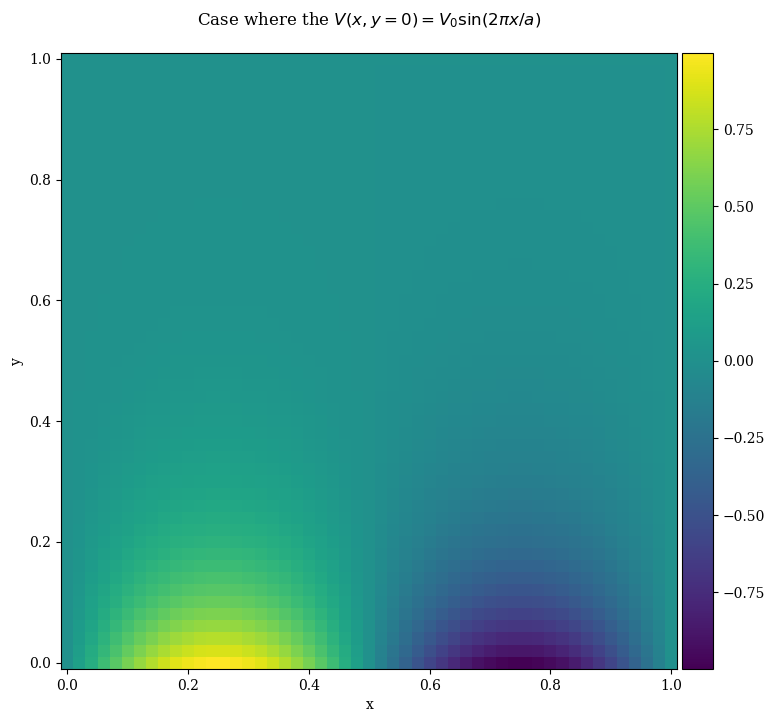

In [7]:
#straight from example code w/ title changed 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
im = plt.pcolormesh(x, y, V)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title("Case where the $V(x,y = 0) = V_0\sin(2\pi x/a)$", pad=20)
plt.savefig("case1.png")
plt.show()


In [8]:
#added by me 
#calculating the value for the analytical at each point along the grid 
xa,ya=np.meshgrid(x0,y0)
V_ana = np.zeros_like(xa)
range_x = np.arange(0, nx, 1)
range_y = np.arange(0, ny, 1)
for i in range_x: 
    for j in range_y:
        V_ana[i,j] = V0/(1-np.exp((4*np.pi*b)/a))*np.sin((2*np.pi*xa[i,j])/a)*(np.exp((2*np.pi*ya[i,j])/a)- np.exp(np.pi*(4*b -2*ya[i,j])/a))
        


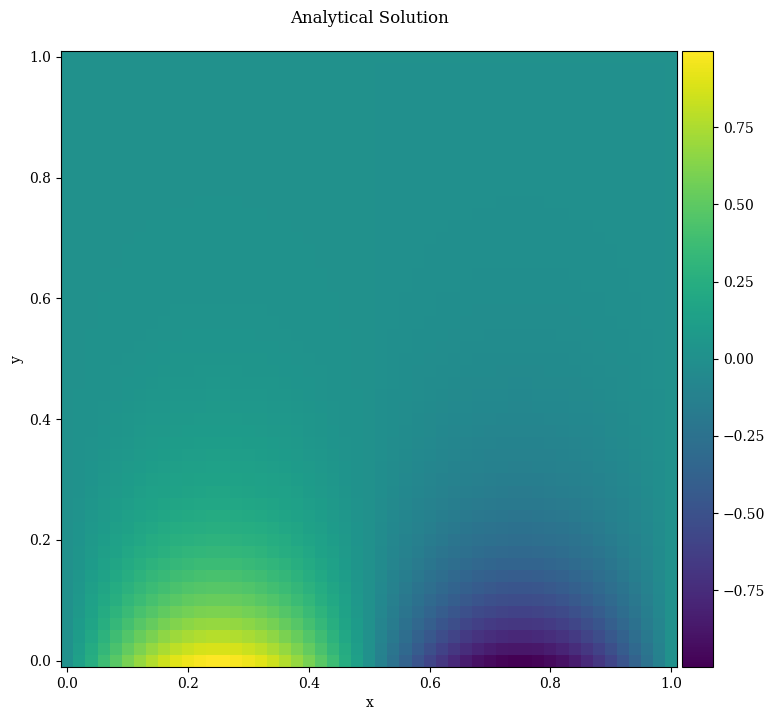

In [9]:
#repeating the same plotting procedure as above but for the analytical solution
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
im = plt.pcolormesh(x, y, V_ana)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title("Analytical Solution", pad=20)
plt.savefig("analytical.png")
plt.show()
#solution produces appears to match the numerical solution, so this is good 

In [10]:
#code written by me
#calculating the difference between the analytical and numerical solution at each point in the grid 
xe, ye = np.meshgrid(x0, y0)
V_err = np.zeros_like(x)
range_x = np.arange(0, nx, 1)
range_y = np.arange(0, ny, 1)
for i in range_x: 
    for j in range_y: 
        V_err[i,j] = np.absolute(V_ana[i,j] - V[i,j]) 

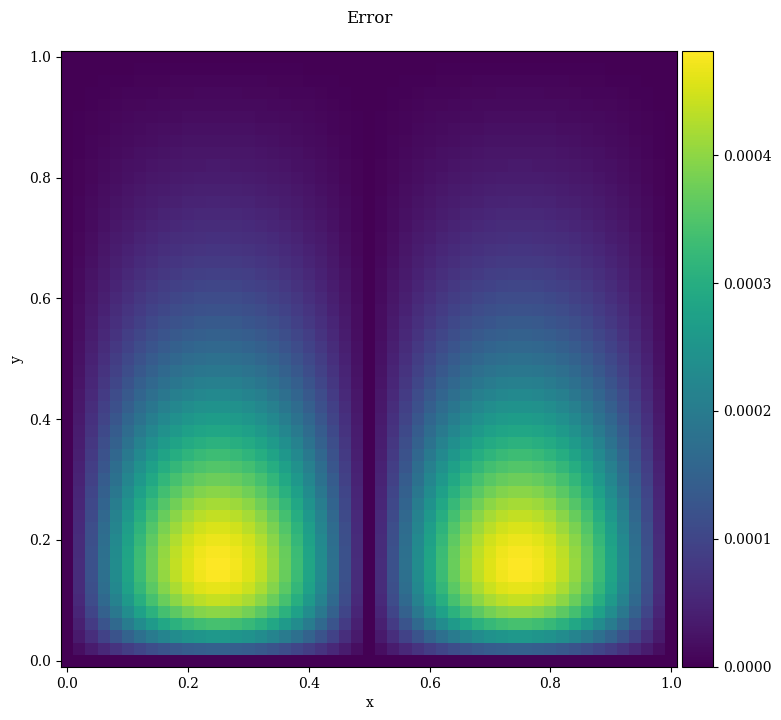

In [11]:
#again, same plotting procedure, just replacing variables with the variables of interest(V_err)
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
im = plt.pcolormesh(x, y, V_err)
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("y")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title("Error", pad=20)
plt.savefig("error3.png")
plt.show()

In [13]:
#plot in 3D 
import k3d
from k3d.colormaps import matplotlib_color_maps
plt_surface = k3d.surface(V,
                          xmin=x0[0], xmax=x0[-1],
                          ymin=y0[0], ymax=y0[-1],
                          # wireframe=True,
                          # compression_level=9,
                          color_map=matplotlib_color_maps.Coolwarm,
                          attribute=V, color_range=[np.amin(V), np.amax(V)])


plot = k3d.plot()
plot += plt_surface
plot.display()

Output()